# Task 2: Data Visualization & Storytelling

## Qsts to be answered 
- How many unique categories are there?
- How many reactions are there to the most popular category?
- What was the month with the most posts?

In [2]:
#Loading dataset 
import pandas as pd 
df = pd.read_csv("Task 3_Final Content Data set.csv" , index_col=0)
df.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,7/11/20 9:43,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/6/21 12:22,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/4/21 5:13,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,6/1/21 19:13,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/8/20 12:25,photo,studying,positive,30


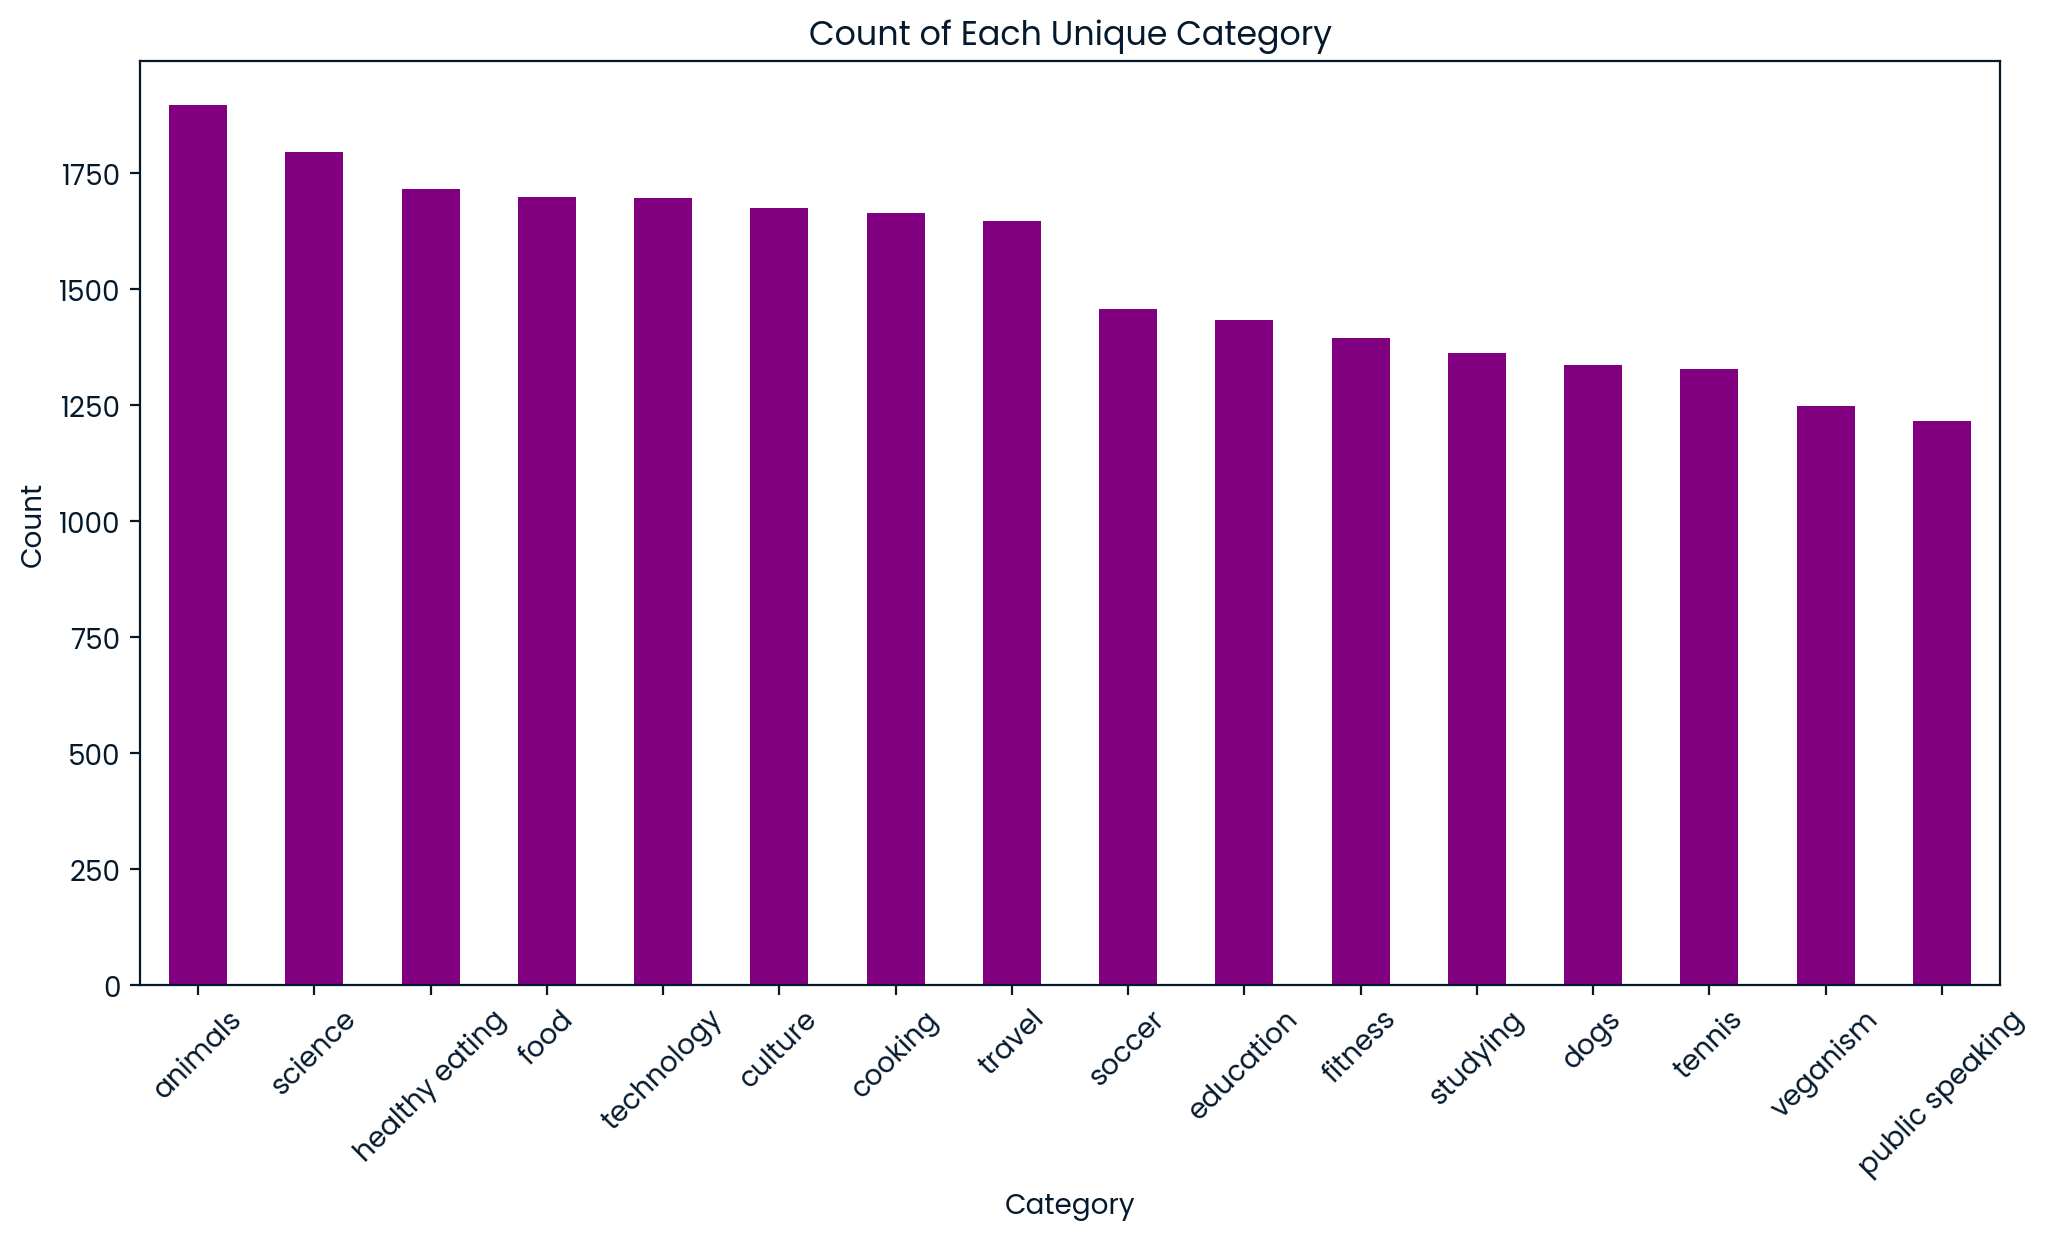

In [6]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each category
category_counts = df["Category"].value_counts()

# Create a bar chart to showcase the count of each unique category
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='purple')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Each Unique Category')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Calculate the total score for each category
category_popularity = df.groupby("Category")["Score"].sum().reset_index()

# Sort the categories by total score in descending order
category_popularity = category_popularity.sort_values(by="Score", ascending=False)

# Get the top 5 categories with the largest popularity
top_5_categories = category_popularity.head(5)

# Calculate the number of reactions for each of the top 5 categories
top_5_categories["Reaction Count"] = top_5_categories["Category"].apply(lambda x: df[df["Category"] == x]["Reaction Type"].count())

top_5_categories

,Category,Score,Reaction Count
0,animals,74965,1897
9,science,71168,1796
7,healthy eating,69339,1717
12,technology,68738,1698
6,food,66676,1699


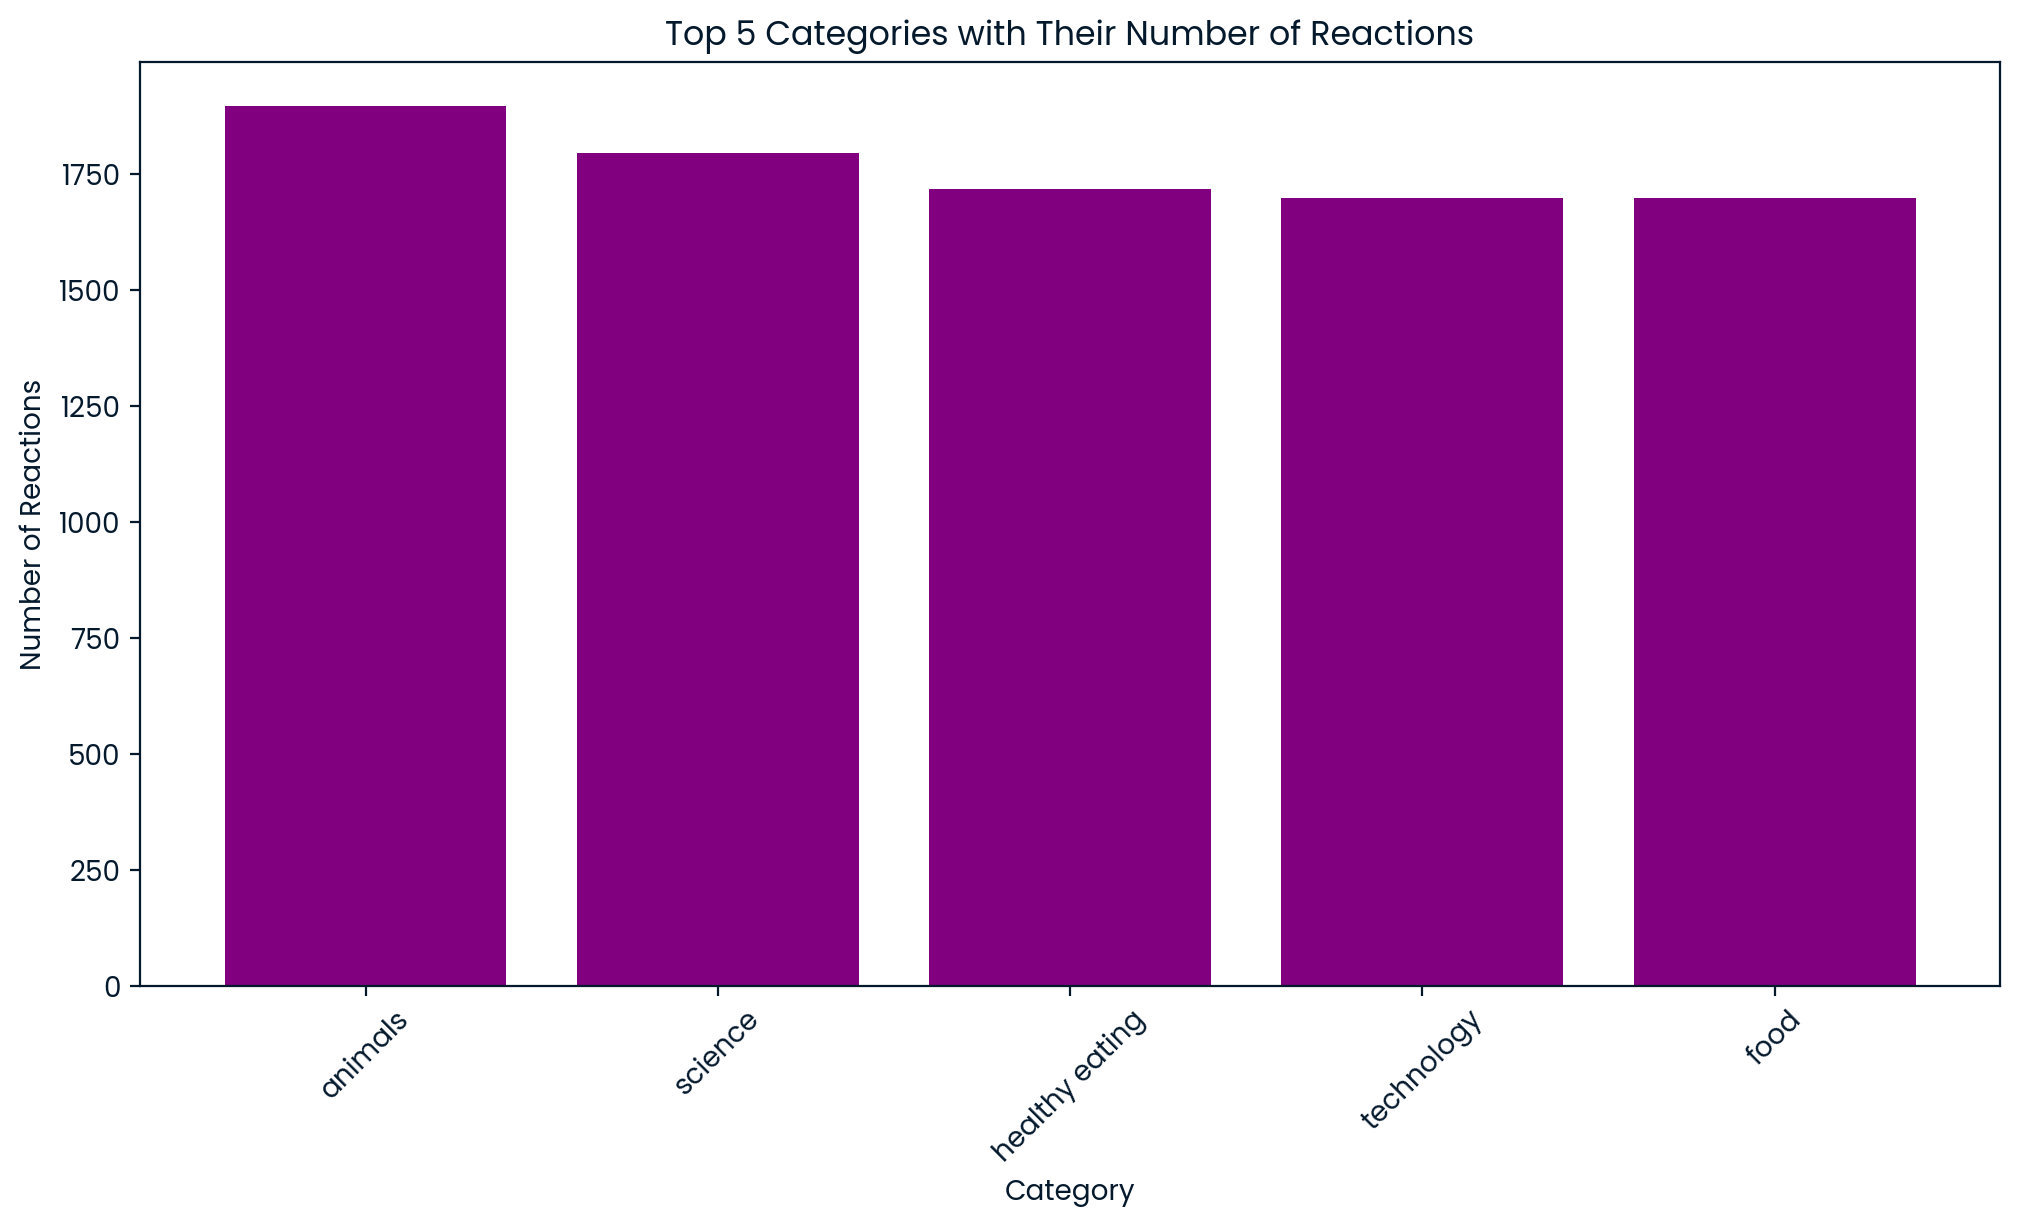

In [17]:
# Plot the top 5 categories with their number of reactions
plt.figure(figsize=(12, 6))
plt.bar(top_5_categories["Category"], top_5_categories["Reaction Count"], color='purple')
plt.xlabel('Category')
plt.ylabel('Number of Reactions')
plt.title('Top 5 Categories with Their Number of Reactions')
plt.xticks(rotation=45)
plt.show()

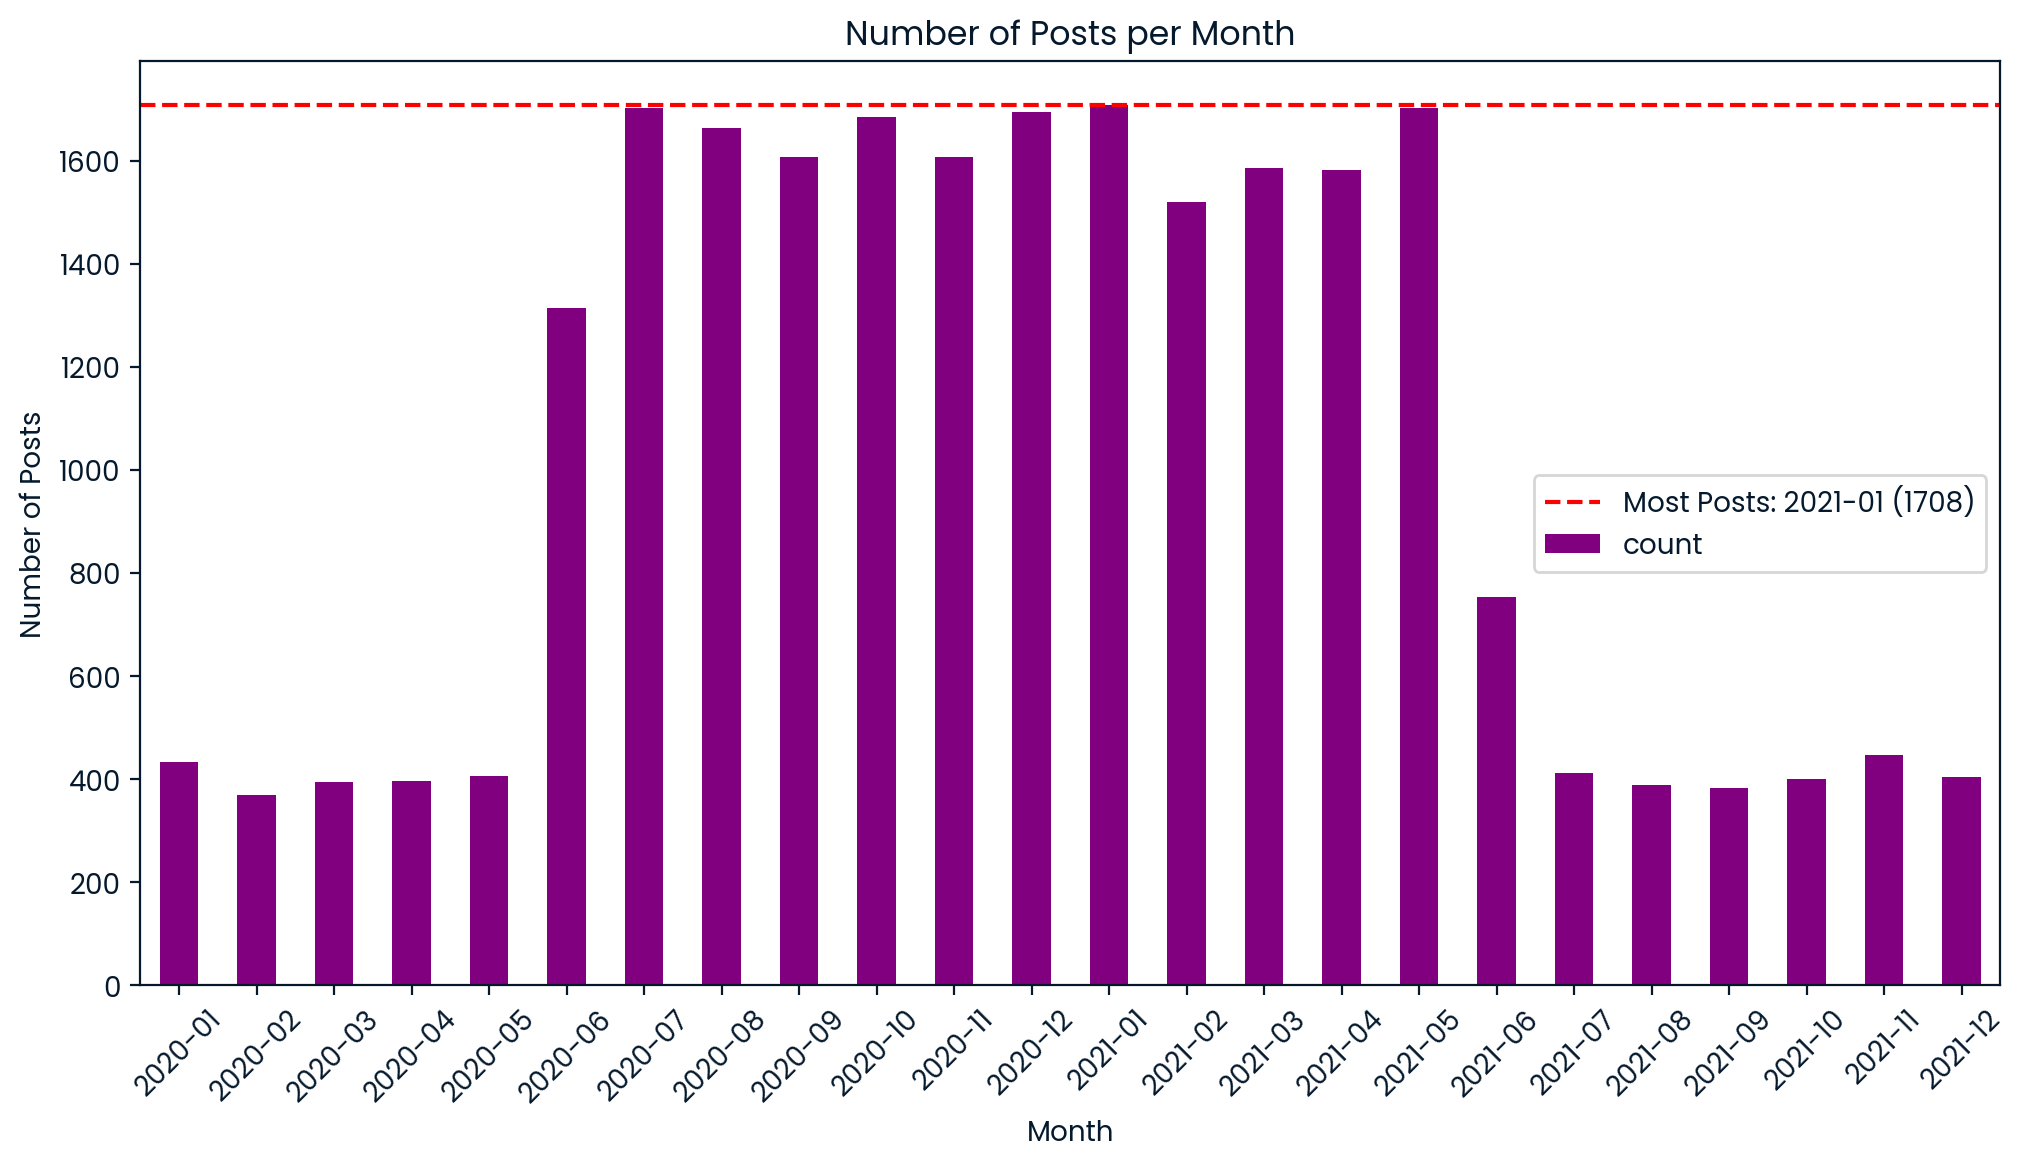

In [19]:
import matplotlib.pyplot as plt

# Convert the 'Datetime' column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extract the month and year from the 'Datetime' column
df['Month'] = df['Datetime'].dt.to_period('M')

# Count the number of posts for each month
monthly_post_counts = df['Month'].value_counts().sort_index()

# Find the month with the most posts
most_posts_month = monthly_post_counts.idxmax()
most_posts_count = monthly_post_counts.max()

# Plot the number of posts for each month
plt.figure(figsize=(12, 6))
monthly_post_counts.plot(kind='bar', color='purple')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.title('Number of Posts per Month')
plt.xticks(rotation=45)
plt.axhline(y=most_posts_count, color='r', linestyle='--', label=f'Most Posts: {most_posts_month} ({most_posts_count})')
plt.legend()
plt.show()

## Summary

In summary, our analysis highlights the top 5 content categories by reaction count, showcasing the most engaging topics for our audience. Additionally, we identified monthly posting trends, with a clear peak in activity, which can inform our future content planning and engagement strategies. These insights are crucial for optimizing our content to better meet audience preferences and maximize engagement.